### Today Objectives:

* Ridge Regression
* Lasso Regression
* Metrics in Regression
* RandomForest Classification
* Metrics in classification
* Confussion Matrix

### Regularization:

* It is tuning technique.
* It is used for:
    * Attempt to solve overfitting(low bias and high variance) problems
    * It Reduce the errors by fitting functions on given dataset and avoid the overfitting
    * For generalized models
    * improves the model performance on the unseen data as well
    
### Ridge Regression:

* It converts the high variance to low variance
* It is also knows as L2-Regularization



In [1]:
import pandas as pd
import numpy as np

In [2]:
d={'sexp':[1,2,3,4,5,6],'ssal':[1000,2000,3000,4000,5000,6000]}
df=pd.DataFrame(d)
df

,sexp,ssal
0,1,1000
1,2,2000
2,3,3000
3,4,4000
4,5,5000
5,6,6000


In [3]:
# select input and output
x=df[['sexp']]
y=df['ssal']

In [4]:
# apply dataset in Linearregression
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x,y)

LinearRegression()

In [5]:
# find the score
model.score(x,y)

1.0

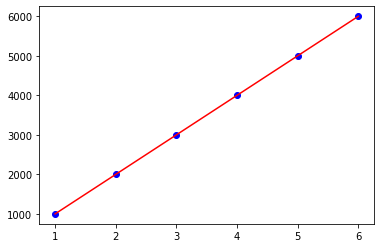

In [7]:
# visulization
import matplotlib.pyplot as plt
plt.scatter(x,y,color='b')
plt.plot(x,model.predict(x),color='r')
plt.show()

In [8]:
# Using Ridge
from sklearn.linear_model import Ridge
model=Ridge()
model.fit(x,y)

Ridge()

In [9]:
model.score(x,y)

0.9970781592403214

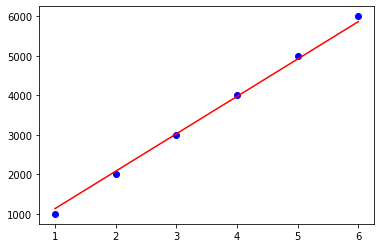

In [11]:
import matplotlib.pyplot as plt
plt.scatter(x,y,color='b')
plt.plot(x,model.predict(x),color='r')
plt.show()

In [12]:
# Boston dataset with linear and ridge
from sklearn.datasets import load_boston
d=load_boston()
d

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [17]:
df=pd.read_csv("C:\\Users\\Kanakamma\\Anaconda3\\lib\\site-packages\\sklearn\\datasets\\data\\boston_house_prices.csv",skiprows=1)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [18]:
#help(pd.read_csv)

In [19]:
# select features and labels
x=df.drop('MEDV',axis=1)
y=df['MEDV']

In [21]:
# split data into training and testing
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=42)

In [22]:
# select the model
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(xtrain,ytrain)

LinearRegression()

In [25]:
# find the score
print("training score is:",model.score(xtrain,ytrain))
print("testing score is: ",model.score(xtest,ytest))

training score is: 0.7434997532004697
testing score is:  0.7112260057484872


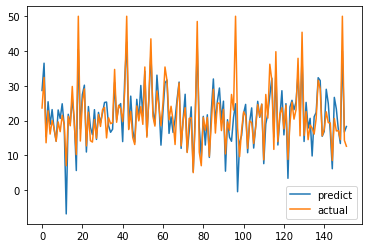

In [29]:
# visulization
import matplotlib.pyplot as plt
ypred=model.predict(xtest)
plt.plot(ypred,label="predict")
plt.plot(ytest.values,label='actual')
plt.legend()
plt.show()

In [30]:
# using Ridge
from sklearn.linear_model import Ridge
model=Ridge()
model.fit(xtrain,ytrain)

Ridge()

In [31]:
# find the score
print("training score is:",model.score(xtrain,ytrain))
print("testing score is:",model.score(xtest,ytest))

training score is: 0.7415671063241829
testing score is: 0.7041586727559432


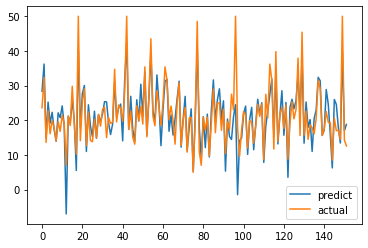

In [32]:
# visulization
import matplotlib.pyplot as plt
ypred=model.predict(xtest)
plt.plot(ypred,label="predict")
plt.plot(ytest.values,label='actual')
plt.legend()
plt.show()

### Lasso Regression:

* It is used for converting from High variance into low variance
* Lasso Regression is also know as L1-Regularization


In [33]:
from sklearn.linear_model import Lasso
model=Lasso()
model.fit(xtrain,ytrain)

Lasso()

In [34]:
# find the score
print("trianing score is ",model.score(xtrain,ytrain))
print("testing score is ",model.score(xtest,ytest))

trianing score is  0.6899591642958296
testing score is  0.655906082915434


In [35]:
from sklearn.metrics import r2_score
ypred=model.predict(xtest)
print("score is ",r2_score(ytest,ypred))

score is  0.655906082915434


In [36]:
# Error metrics in regression
# Mean Square Error
# Mean absolute Error
# Root mean square error

from sklearn.metrics import mean_absolute_error,mean_squared_error
print("mean square error is :",mean_squared_error(ytest,ypred))
print("mean absolute error is :",mean_absolute_error(ytest,ypred))
print("root mean square error is: ",np.sqrt(mean_squared_error(ytest,ypred)))

mean square error is : 25.63950292804399
mean absolute error is : 3.6587976291978785
root mean square error is:  5.06354647732634


### Random Forest:

* It classifies the data using no.of decision_trees for classification
* It return the output which decision tree provides good accuracy

In [37]:
# dataset load
from sklearn.datasets import load_breast_cancer
d=load_breast_cancer()
df=pd.DataFrame(d.data,columns=d.feature_names)
df['Target']=d.target
df.sample(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
362,12.76,18.84,81.87,496.6,0.09676,0.07952,0.02688,0.01781,0.1759,0.06183,...,25.99,87.82,579.7,0.1298,0.1839,0.1255,0.08312,0.2744,0.07238,1
180,27.22,21.87,182.10,2250.0,0.10940,0.19140,0.28710,0.18780,0.1800,0.05770,...,32.85,220.80,3216.0,0.1472,0.4034,0.5340,0.26880,0.2856,0.08082,0
457,13.21,25.25,84.10,537.9,0.08791,0.05205,0.02772,0.02068,0.1619,0.05584,...,34.23,91.29,632.9,0.1289,0.1063,0.1390,0.06005,0.2444,0.06788,1
64,12.68,23.84,82.69,499.0,0.11220,0.12620,0.11280,0.06873,0.1905,0.06590,...,33.47,111.80,888.3,0.1851,0.4061,0.4024,0.17160,0.3383,0.10310,0
129,19.79,25.12,130.40,1192.0,0.10150,0.15890,0.25450,0.11490,0.2202,0.06113,...,33.58,148.70,1589.0,0.1275,0.3861,0.5673,0.17320,0.3305,0.08465,0


In [38]:
#select input and output
x=df.drop('Target',axis=1)
y=df['Target']

In [39]:
# split data into training and testing
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=42)

In [40]:
# select the model
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(xtrain,ytrain)

RandomForestClassifier()

In [41]:
# find the predict score
ypred=model.predict(xtest)
ypred

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1])

In [43]:
# find the score
print("training score is ",model.score(xtrain,ytrain))
print("testing score is ",model.score(xtest,ytest))

training score is  1.0
testing score is  0.9649122807017544


In [44]:
# find the score using metrics
from sklearn.metrics import accuracy_score
print("score is ",accuracy_score(ytest,ypred))

score is  0.9649122807017544


In [45]:
# print the table with actual data and predict
d=pd.DataFrame({'actual':ytest,'predict':ypred})
d.sample(7)

,actual,predict
556,1,1
442,1,1
238,1,1
18,0,0
257,0,0
434,1,1
30,0,0


In [46]:
# confusion matrix
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(ytest,ypred)

array([[ 59,   4],
       [  2, 106]], dtype=int64)

In [47]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95        63
           1       0.96      0.98      0.97       108

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



In [48]:
# accuracy
(59+106)/(59+106+4+2)

0.9649122807017544

In [49]:
# precision
(59)/(59+2)

0.9672131147540983

In [50]:
# recall
59/(59+4)

0.9365079365079365